In [1]:
from src.environment import NormalMoveEnv
from src.experiment import Experiment
from src.nn import BetaModel, Model, GeneralModel
from src.rl import Agent, Trajectory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib agg
# cmd -> cd .\notebooks\
# cmd -> mlflow ui

In [2]:
experiment_name = 'Big Env'
experiment_description = 'Teste com Ambiente grande e complexo'
num_runs = 5

In [3]:
import mlflow
from mlflow import MlflowException

try:
    exp_id = mlflow.create_experiment(experiment_name, tags={'mlflow.note.content':experiment_description})
    exp = mlflow.get_experiment(exp_id)
except MlflowException as e:
    exp = mlflow.get_experiment_by_name(experiment_name)
    exp_id = exp.experiment_id

print('experiment_id:', exp_id)

experiment_id: 763925609696840962


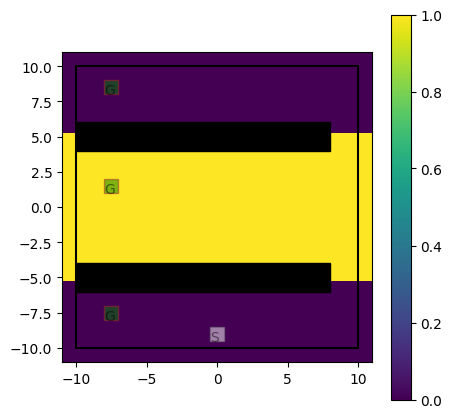

In [31]:
env_params= {
    'walls': [([-10.,-6.],[8., -4.]), ([-10.,4.],[8., 6.])],
    # 'walls': [],
    'goals': [([-8.,-8.],[-7.,-7.]), ([-8., 1.],[-7., 2.]), ([-8., 8.],[-7., 9.])],
    'start': ([-.5,-9.5],[.5,-8.5]),
    'beta': lambda s: (s[1]>-5. and s[1]<5.)
}

env = NormalMoveEnv(**env_params)
ax = env.plot()
ax.get_figure()

In [4]:
start = ([0.,-9.9],[9.9,-5.])
goals = [([-9.,8.],[-8.,9.])]
envs_params= [{
        # 'walls': [([-9.,-1.],[10., 1.])],
        'walls': [],
        'goals': goals,
        'start': start,
        'beta': lambda s: (s[1]>-4. and s[1]<4.)
    },
    {
        'walls': [],
        'goals': goals,
        'start': start,
        'beta': lambda s: (s[0]>-5. and s[0]<5.)
    }
]
model_params = {
    "lr":1e-6, 
    'momentum':.9,
    'td_model_steps': 10, 
    'memory_size': 0, 
    'max_plan_size': 3, 
}
k_model_params = {
    'k':5, 
    'model': Model
}
general_params = {
    'model': GeneralModel
}

In [5]:
def gen_env(env_params):
    mlflow.log_params(env_params)
    env = NormalMoveEnv(**env_params)
    mlflow.log_figure(env.plot().get_figure(), f"env.png")
    return env

def run(model, params, episode_size_limit=300):
    model.reset()
    mlflow.log_params(model_params)
    mlflow.log_params(params)
    model.episode(size_limit=episode_size_limit)
    
    mlflow.log_figure(model.plot(kind='probs'), "probs.png")
    mlflow.log_figure(model.plot(), "params.png")
    for plan_id, plan in enumerate(model.plans):
        mlflow.log_figure(model.plot(kind='plan', plan=plan_id), f"plans/plan-{plan_id:03d}.png")

    mlflow.log_metric("Trajectory Size", model.trajectory.run.shape[0])
    mlflow.log_metric("Final Likelyhood", model.lls[-1])

In [6]:
for i in range(num_runs):
    with mlflow.start_run(experiment_id=exp_id, run_name=f'{i}'):
        has_models = False
        for e, env_param in enumerate(envs_params):
            with mlflow.start_run(experiment_id=exp_id, run_name=f'epi-{e}', nested=True):
                env = gen_env(env_param)

                if has_models:
                    k_models.env = env
                    general.env = env
                else:
                    k_models = Agent(env, **k_model_params, **model_params)
                    general = Agent(env, **general_params, **model_params)
                    has_models = True
                    
                with mlflow.start_run(experiment_id=exp_id, run_name='K-Models', nested=True):
                    mlflow.log_param("run", i)
                    mlflow.log_param("episode", e)
                    mlflow.log_figure(env.plot().get_figure(), f"env.png")
                    run(k_models, k_model_params)
                with mlflow.start_run(experiment_id=exp_id, run_name='General', nested=True):
                    mlflow.log_param("run", i)
                    mlflow.log_param("episode", e)
                    mlflow.log_figure(env.plot().get_figure(), f"env.png")
                    run(general, general_params)

C:\Users\guilherme.albarrans\Workspace\kmbrl\src\rl.py:289: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 5))


Parametros estimados para cada estado.
Parametros estimados para cada estado.
Parametros estimados para cada estado.
---ERRO---
self.plans:  100
self.plans[-1]:  1
self.plan_step:  1
Parametros estimados para cada estado.
Parametros estimados para cada estado.
Parametros estimados para cada estado.
Parametros estimados para cada estado.
Parametros estimados para cada estado.
-------Erro no Treinamento-----------
---ERRO---
self.plans:  123
self.plans[-1]:  0
self.plan_step:  1
---ERRO---
self.plans:  124
self.plans[-1]:  0
self.plan_step:  1
---ERRO---
self.plans:  125
self.plans[-1]:  0
self.plan_step:  1
---ERRO---
self.plans:  126
self.plans[-1]:  0
self.plan_step:  1
---ERRO---
self.plans:  127
self.plans[-1]:  0
self.plan_step:  1
---ERRO---
self.plans:  128
self.plans[-1]:  0
self.plan_step:  1
---ERRO---
self.plans:  129
self.plans[-1]:  0
self.plan_step:  1
---ERRO---
self.plans:  130
self.plans[-1]:  0
self.plan_step:  1
---ERRO---
self.plans:  131
self.plans[-1]:  0
self.plan